## Descripció

Aprèn a realitzar estadístiques amb Python.

## Nivell 1

**- Exercici 1:**
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica.

La base de dades és una porció de l'emprada a la tasca del sprint 5è. Es retalla la BBDD a només la lliga NHL (National Hockey League) disponibles pels anys del segle 21 (del 2000 al 2011).

In [1]:
import pandas as pd
scoring_NHL_2000_2011=pd.DataFrame(pd.read_csv('Scoring_NHL_2000_2011.csv'))

In [2]:
scoring_NHL_2000_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11711 entries, 0 to 11710
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  11711 non-null  object 
 1   year      11711 non-null  int64  
 2   tmID      11711 non-null  object 
 3   pos       11711 non-null  object 
 4   GP        11711 non-null  float64
 5   G         11711 non-null  float64
 6   A         11711 non-null  float64
 7   Pts       11711 non-null  float64
 8   PIM       11711 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 823.6+ KB


Primer generarem les dades mitançant la creació de mètodes amb Python:

In [3]:
def mitja_aritmetica(llista_valors):
    return sum(llista_valors) / len(llista_valors)

def calc_mediana(llista_valors):
    mediana=0
    llista_valors.sort()
    if len(llista_valors)%2==0:
        mediana=(llista_valors[(len(llista_valors)//2)-1]+llista_valors[len(llista_valors)//2])/2
    else:
        mediana=llista_valors[(len(llista_valors))//2]
    return mediana    

In [4]:
from collections import Counter

def moda(llista_valors):
    c = Counter(llista_valors)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]  

In [5]:
import math
def desviacio_std_poblacio(llista_valors):
    mitja_ar= mitja_aritmetica(llista_valors)
    desv_std=0
    for i in llista_valors:
        desv_std += (1/(len(llista_valors)))*math.pow((i-mitja_ar),2)
    desv_std= math.sqrt(desv_std)  
    return desv_std   
    
def desviacio_std_mostra(llista_valors):
    mitja_ar= mitja_aritmetica(llista_valors)
    desv_std=0
    for i in llista_valors:
        desv_std += (1/(len(llista_valors)-1))*math.pow((i-mitja_ar),2)
    desv_std= math.sqrt(desv_std)  
    return desv_std    


In [6]:
goals_NHL21th=list(scoring_NHL_2000_2011['G']) #apliquem mètodes als registres de gols:

In [7]:
goal_mean=mitja_aritmetica(goals_NHL21th)
goals_median=calc_mediana(goals_NHL21th)
goals_moda=moda(goals_NHL21th)
goals_dsv_std_pob= desviacio_std_poblacio(goals_NHL21th)
goals_dsv_std_mos= desviacio_std_mostra(goals_NHL21th)
#goals_mode=

In [8]:
print (f'La mitja aritmètica de gols marcats és de {round(goal_mean,2)} per jugador i any.' )
print (f'La mediana del llistat de gols és {round(goals_median)}.')
print (f'La moda del llistat de gols és {round(goals_moda[0])}.')
print (f'La desviació estandar de la població de la llista de gols és {round(goals_dsv_std_pob,2)}.')
print (f'La desviació estandar mostral de la llista de gols és {round(goals_dsv_std_mos,2)}.')

La mitja aritmètica de gols marcats és de 6.35 per jugador i any.
La mediana del llistat de gols és 3.
La moda del llistat de gols és 0.
La desviació estandar de la població de la llista de gols és 8.7.
La desviació estandar mostral de la llista de gols és 8.7.


Després, generarem les mateixes dades però mitançant l'ús de la llibreria statistics ja implementada en Python:

In [9]:
import statistics as st
goal_mean=st.mean(goals_NHL21th)
goals_median=st.median(goals_NHL21th)
goals_moda=st.multimode(goals_NHL21th)
goals_dsv_std_pob= st.pstdev(goals_NHL21th)
goals_dsv_std_mos= st.stdev(goals_NHL21th)

In [10]:
print (f'La mitja aritmètica de gols marcats és de {round(goal_mean,2)} per jugador i any.' )
print (f'La mediana del llistat de gols és {round(goals_median)}.')
print (f'La moda del llistat de gols és {round(goals_moda[0])}.')
print (f'La desviació estandar de la població de la llista de gols és {round(goals_dsv_std_pob,2)}.')
print (f'La desviació estandar mostral de la llista de gols és {round(goals_dsv_std_mos,2)}.')

La mitja aritmètica de gols marcats és de 6.35 per jugador i any.
La mediana del llistat de gols és 3.
La moda del llistat de gols és 0.
La desviació estandar de la població de la llista de gols és 8.7.
La desviació estandar mostral de la llista de gols és 8.7.


Recursos trobats: 
* https://stackabuse.com/calculating-mean-median-and-mode-in-python/

* https://vitalflux.com/standard-deviation-sample-population-python-code/



**- Exercici 2:**
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

Selecciono els gols marcats (Columna G) respecte els minuts que s'ha expulsat el jugador (Columna PIM) .

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
scoring_NHL_2000_2011['PIM'].corr(scoring_NHL_2000_2011['G'])

0.3079773369969704

La correlació entre estar més o menys penalitzat i els gols marcats és dèbil. Ho podem veure també graficament:

Text(0.5, 1.0, 'Goals vs Time Expulsed')

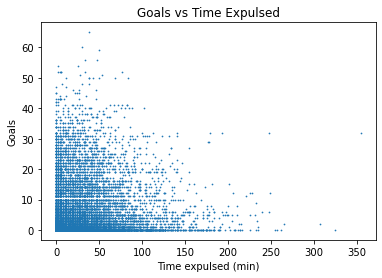

In [15]:
z=plt.scatter(pim_NHL21th,goals_NHL21th, s=0.5, alpha=1.0)
plt.xlabel('Time expulsed (min)')
plt.ylabel('Goals')
plt.title('Goals vs Time Expulsed')

Webs consultades: https://realpython.com/numpy-scipy-pandas-correlation-python/

## Nivell 2

**- Exercici 3:**
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

**Abreviatures:**

GP: Gols de penalti

G: Gols totals

A: Assistències

Pts: Punts (sumar assistències i Gols)

PIM: Minuts expulsats del camp per penalització

In [16]:
import seaborn as sns
scoring_NHL_2000_2011.corr()

,year,GP,G,A,Pts,PIM
year,1.000000,0.021091,0.016426,0.024066,0.021996,-0.061580
GP,0.021091,1.000000,0.627846,0.710989,0.710039,0.586849
G,0.016426,0.627846,1.000000,0.813839,0.931527,0.307977
A,0.024066,0.710989,0.813839,1.000000,0.969439,0.344323
Pts,0.021996,0.710039,0.931527,0.969439,1.000000,0.345518
PIM,-0.061580,0.586849,0.307977,0.344323,0.345518,1.000000


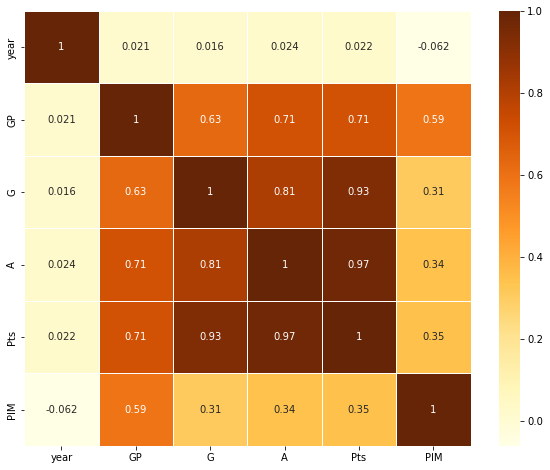

In [17]:
g=sns.heatmap(scoring_NHL_2000_2011.corr(),cmap='YlOrBr',annot=True, linewidths=1, linecolor='white')
g.figure.set_size_inches(10,8)


La representació gràfica de les correlacions es pot generar amb pairplot de Seaborn:

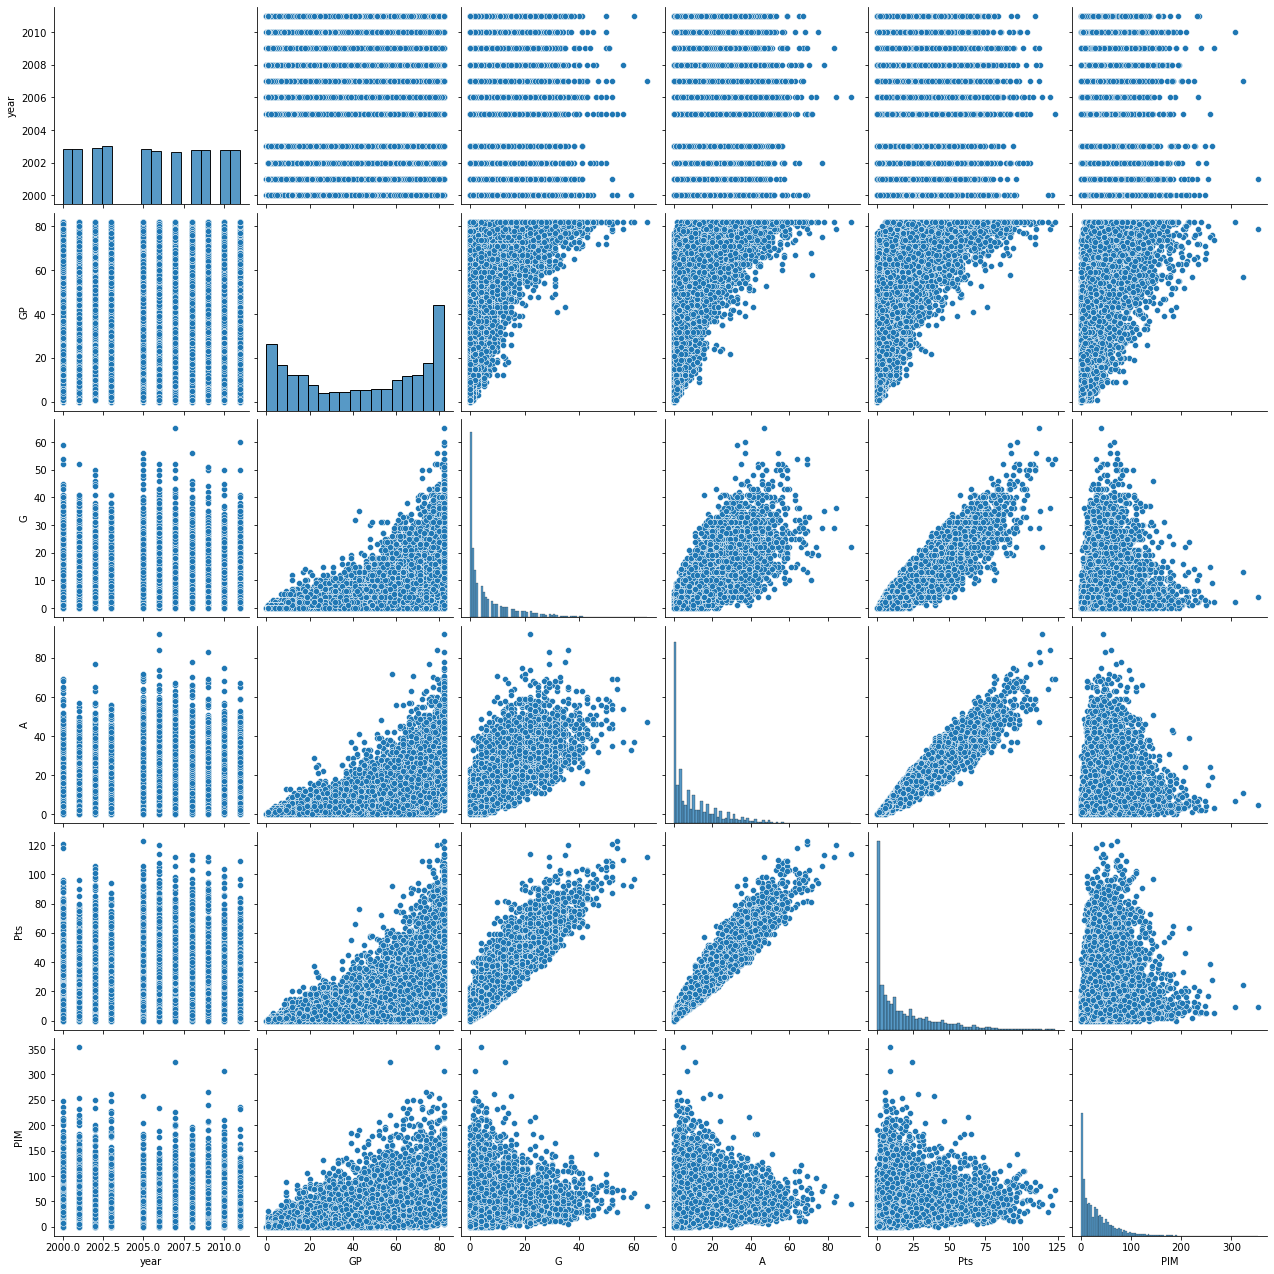

In [38]:
sns.pairplot(scoring_NHL_2000_2011,height=3)

La correlació entre gols vs puntuació i assistència vs puntuació és molt alta ja que la puntuació depèn directament d'aquestes dues. Sí que hi ha una bona correlació entre els gols marcats i les assistencies a gols, és lògic que qui més marca també doni gols (són davanters i el hockey és un esport d'equip).

## Nivell 3

**- Exercici 4:**
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

Prenem una base de dades on dona infomació de tots els atletes que han passat per un jocs olímpics. Especificament agafem l'atribut del pes dels atletes i fem neteja dels valors nuls:

In [19]:
olimpics=pd.read_csv('athlete_events.csv')
olimpics_weight=olimpics['Weight'].copy()
olimpics_weight.dropna(inplace=True)
olimpics_weight

0         80.0
1         60.0
4         82.0
5         82.0
6         82.0
          ... 
271111    89.0
271112    59.0
271113    59.0
271114    96.0
271115    96.0
Name: Weight, Length: 208241, dtype: float64

In [20]:
import statistics as st
olimpics_weight_mean=st.mean(olimpics_weight)
olimpics_weight_median=st.median(olimpics_weight)
olimpics_weight_moda=st.multimode(olimpics_weight)
olimpics_weight_dsv_std_pob= st.pstdev(olimpics_weight)
olimpics_weight_dsv_std_mos= st.stdev(olimpics_weight)

In [26]:
print (f'La mitja aritmètica del pes és de {round(olimpics_weight_mean,2)} Kg per athleta.' )
print (f'La mediana del llistat de pes dels atletes olímpics és {round(olimpics_weight_median)}.')
print (f'La moda del llistat de pes dels atletes olímpics és {round(olimpics_weight_moda[0])}.')
print (f'La desviació estandar de la població de la llista de pes dels atletes olímpics és {round(olimpics_weight_dsv_std_pob,2)} Kg.')
print (f'La desviació estandar mostral de la llista de pes dels atletes olímpics és {round(olimpics_weight_dsv_std_mos,2)} Kg.')

La mitja aritmètica del pes és de 70.7 Kg per athleta.
La mediana del llistat de pes dels atletes olímpics és 70.
La moda del llistat de pes dels atletes olímpics és 70.
La desviació estandar de la població de la llista de pes dels atletes olímpics és 14.35.
La desviació estandar mostral de la llista de pes dels atletes olímpics és 14.35.


In [31]:
ol_w_gmean=round(st.geometric_mean(olimpics_weight),2)
print (f'La mitjana geomètria de la llista de pes dels atletes olímpics és {ol_w_gmean} Kg.')


La mitjana geomètria de la llista de pes dels atletes olímpics és 69.3 Kg.


In [34]:
ol_w_hmean=round(st.harmonic_mean(olimpics_weight),2)
print (f'La mitjana harmònica de la llista de pes dels atletes olímpics és {ol_w_hmean} Kg.')

La mitjana harmònica de la llista de pes dels atletes olímpics és 67.93 Kg.


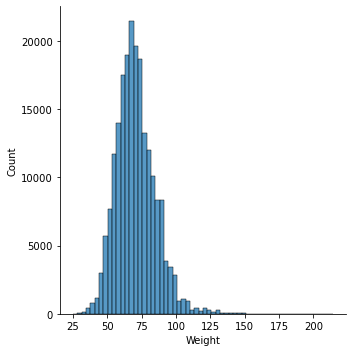

In [24]:
sns.displot(olimpics_weight,bins=60)

Fonts: https://docs.python.org/es/3.8/library/statistics.html

Mitja geomètrica: https://youtu.be/clblEH6d2xM

Mitja Harmònica: https://youtu.be/k6qrlyYdUlc